#웹크롤링 준비


In [ ]:
pip install selenium

In [ ]:
#모듈 및 인스타그램 url 가져오기 
from selenium import webdriver
import time
driver = webdriver.Chrome('C:/Users/Administrator/Downloads/chromedriver_win32/chromedriver.exe')
url ='https://www.instagram.com'
driver.get(url)
time.sleep(2)

In [ ]:
# id 입력
email = 'seonmk12@gmail.com'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

In [ ]:
# password
import getpass
password = getpass.getpass('비밀번호를 입력하세요: ')
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

# 웹크롤링 시작 

In [ ]:
# 검색어 입력
word = '백신'#' 연관 검색어 '백신접종완료'
url = 'https://www.instagram.com/explore/tags/' + word
driver.get(url)

In [ ]:
# 크롤링할 함수 만들기 
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    # 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    # 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ''
    
    # 본문 내용 해시태그 가져오기
    tags = re.findall(r'#[^\s#,\\]+', content)
      
    # 작성일자 정보
    date = soup.select('time.FH9sR.Nzb55')[0]['datetime'][:10]
    
    # 좋아요
    try:
        like = soup.select('div.Nm9Fw > a > span')[0].text
    except:
        like = 0
    # 장소
    try:
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
    #  정보저장 
    data = [content, date, like, place, tags]
    return data


def move_next(driver):
    right = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    

In [ ]:
# 크롤링
results = []
target = 300
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:      
        time.sleep(2)
        move_next(driver)
print(results[0:10])

In [ ]:
    try:
        driver.find_element_by_xpath('//*[@id="info.search.place.more"]').send_keys(Keys.ENTER)
        sleep(1)

        # 2~ 5페이지 읽기
        for i in range(2, 6):
            # 페이지 넘기기
            xPath = '//*[@id="info.search.page.no' + str(i) + '"]'
            driver.find_element_by_xpath(xPath).send_keys(Keys.ENTER)
            sleep(1)

            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            place_lists = soup.select('.placelist > .PlaceItem') # 장소 목록 list

            crawling(place_lists)

    except ElementNotInteractableException:
        print('not found')
    finally:
        search_area.clear()

In [ ]:
# 데이터 저장('백신')
import pandas as pd
results_df = pd.DataFrame(results)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('./210714_insta_crawling.xlsx',index=False)

In [ ]:
#데이터 저장 ('백신접종완료')
import pandas as pd
results_df = pd.DataFrame(results)
# ./ 현재폴더,http://localhost:8888/notebooks/Downloads/insta_210708_5%ED%8C%80%20%EA%B9%80%EC%84%A0%EB%AF%BC.ipynb
# 여기서 Downloads가 현재 폴더!! 
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('./210714_insta_crawling222.xlsx',index=False)

##데이터 전처리 


In [ ]:
# 한글폰트 install
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## '백신','백신접종완료' 크롤링 데이터 합치기


In [82]:
import pandas as pd

instas_df = pd.DataFrame([])

folder ='/content/drive/MyDrive/Colab Notebooks/insta crawling 과제/'
f_list = ['210714_insta_crawling.xlsx',
          '210714_insta_crawling222.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    instas_df= instas_df.append(temp)

instas_df.columns = ['content','date','like','place','tags']
instas_df


,content,date,like,place,tags
0,💙완료!💉1차때처럼 아무렇지 않고 지나가는걸로~!! 화이자 맞고 열나고 몸살기운 있...,2021-07-07,125,"Seoul, Korea","['#화이자', '#백신', '#2차']"
1,여행가고싶다✈️코로나 백신 빨리 맞게 해주세요ㅠㅠ여행갈 수 있게되면 유튜브계정만들어...,2021-06-22,108,NaN,[]
2,병원실습 시작과 함께 백신접종#covid_19 #vaccinationdone✔️#서...,2021-06-29,119,서울성모병원 Seoul St. Mary's Hospital,"['#covid_19', '#vaccinationdone✔️', '#서울성모병원']"
3,#듀펠센터얀센 맞고 시베리아급 오한와 발열이 두려웠으나 22시간이 지날때까지 큰 아...,2021-06-17,147,듀펠센터,"['#듀펠센터얀센', '#얀센백신', '#얀센후기', '#백신', '#크림브륄레',..."
4,#트니트니#캥거루선생님필수 인력 백신맞춰 준다더니..맞는 기간은 고작5일...조기접...,2021-07-07,248,NaN,"['#트니트니', '#캥거루선생님필수', '#백신예약_이건마치전쟁', '#서버폭발🤯..."
...,...,...,...,...,...
293,이 분이 누구 이기에 하늘에 명하여 비를 내리게 할수 있습니까? 이 분이 누구 이기...,2021-07-10,0,NaN,"['#ProphetDrOwuor', '#비트코인', '#도지코인', '#이더리움',..."
294,이 분이 누구 이기에 하늘에 명하여 비를 내리게 할수 있습니까? 이 분이 누구 이기...,2021-07-10,0,NaN,"['#ProphetDrOwuor', '#비트코인', '#도지코인', '#이더리움',..."
295,이 분이 누구 이기에 하늘에 명하여 비를 내리게 할수 있습니까? 이 분이 누구 이기...,2021-07-10,0,NaN,"['#ProphetDrOwuor', '#비트코인', '#도지코인', '#이더리움',..."
296,"Pour it out , Cheers! 🍹#watermelonmojito 🧊역시 술...",2021-07-10,59,XO Bistro + Bar,"['#watermelonmojito', '#인생2회차', '#수박모히또', '#백신..."


In [83]:
#중복 제거하기 
import pandas as pd
instas_df.drop_duplicates(subset=['content'], inplace = True)
# 새로운 파일로 raw data 저장 
instas_df.to_excel('/content/drive/MyDrive/Colab Notebooks/insta crawling 과제/crawling_vaccine_raw2.xlsx',index=False)


In [85]:
raw_total=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/insta crawling 과제/crawling_vaccine_raw2.xlsx')
raw_total.head()

,content,date,like,place,tags
0,💙완료!💉1차때처럼 아무렇지 않고 지나가는걸로~!! 화이자 맞고 열나고 몸살기운 있...,2021-07-07,125,"Seoul, Korea","['#화이자', '#백신', '#2차']"
1,여행가고싶다✈️코로나 백신 빨리 맞게 해주세요ㅠㅠ여행갈 수 있게되면 유튜브계정만들어...,2021-06-22,108,NaN,[]
2,병원실습 시작과 함께 백신접종#covid_19 #vaccinationdone✔️#서...,2021-06-29,119,서울성모병원 Seoul St. Mary's Hospital,"['#covid_19', '#vaccinationdone✔️', '#서울성모병원']"
3,#듀펠센터얀센 맞고 시베리아급 오한와 발열이 두려웠으나 22시간이 지날때까지 큰 아...,2021-06-17,147,듀펠센터,"['#듀펠센터얀센', '#얀센백신', '#얀센후기', '#백신', '#크림브륄레',..."
4,#트니트니#캥거루선생님필수 인력 백신맞춰 준다더니..맞는 기간은 고작5일...조기접...,2021-07-07,248,NaN,"['#트니트니', '#캥거루선생님필수', '#백신예약_이건마치전쟁', '#서버폭발🤯..."


In [86]:
# tag에서 대괄호 없애기 
tags_total=[]
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

tags_total[1]

'#백신'

In [ ]:
from collections import Counter
tag_count=Counter(tags_total)
tag_count.most_common(80)

In [ ]:
#관련없는 태그 정제
STOPWORDS=['#ProphetDrOwuor','','#제주도','#초복','#뷰티','#오오티디','#댕댕이','#소통','#데일리','#집사일상',
           '#마카롱','#커플','#코덕','#메이크업','#도지코인','#반려묘','#집사일상','#오늘코디','#휴거','#졸업','#일상','#좋아요',
          '#이더리움','#보라카이예약', '#보라카이관광','#보라카이','#보라카이여행','#보라카이오픈','#그냥','#주식','#맞팔',
         '#트래블버블', '#비트코인','#인도','#대선출마','#말라기','#이스라엘','#요한계시록','#두증인','#회개와_거룩함','#해운대','#GlobalRepentanceCall',
         '#인스타','#selfie', '#수요일', '#병원','#첫줄','#인천','#먹스타그램', '#일상스타그램','#여행스타그램', '#악마판사', '#심판', '#오딘','#댕9댕이',
         '#예언성취.','#モンハンライズ', '#Ahamo','#藤井フミヤ', '#とくダネ','#サッカー日本代表', '#オーイシマサヨシ', '#Jessica_Walter', '#Fournier.', '#Biden_press_conference',
        '#Nikola_Vucevic','#Miami_Heat', '#Lou_Williams', '#구원', '#아버지', '#몬스터헌터_라이즈', '#DaysOfHisServant', '#핵폭탄',
        '#daily','#instagram','#selca','#운동하는여자','#맛집','#7월','#덥다','#여름','#헬스','#운동스타그램', '#셀스타그램', '#워킹맘', '#반송동꽃집', '#동탄고앞꽃집', '#커피',
        '#인스타그램','#미추홀구','#비트','#제주', '#me','#캠핑카여행','#전국일주', '#오늘도', '#서울', '#필리핀','#운동하는남자','#식단', '#다이어트', '#급등주', '#테마주', '#카카오', '#제발',
        '#에어컨','#코인','#방과후강사','#like','#출근','#오늘', '#저녁','#눈바디','#주식인사이드플레이스토어에서','#불스인베스트','#시황', '#주식스타그램',
         '#ootd', '#주식공부','#BMW','#주식투자','#주식초보', '#수익률','#주린이', '#주식하는법', '#코스피', '#종목추천', '#불금', '#주식정보', '#금리', '#네이버', '#일론머스크',
         '#기록','#운동','#헬린이','#선팔맞팔','#선팔하면맞팔','#화이자1차','#멍스타그램','#맛스타그램','#선팔','#울산','#집밥','#TheMessiahIsComing','#쌤스타그램','#ㅋㅋㅋ','#카페','#보라카이백신','#prophetDrOwuor'
         ,'#용인원데이클레스','#다온이','#육아스타그램','#셀피','#아기스타그램','#세젤귀','#보라카이자가격리','#보라카이자가격리','#김다온','#4살아기','#황금개띠맘','#개띠맘','#인스타베이비','#베이비스타그램','#세젤예','#아이와제주여행','#용인베이킹클래스','#용인원데이클래스','#셀카','#선진키즈태권도장']

tag_selected=[]
for tag in tags_total:
     
    if tag not in STOPWORDS:
        tag_selected.append(tag)

tag_selected_count=Counter(tag_selected)
tag_selected_count.most_common(80)

[('#백신접종완료', 231),
 ('#백신', 227),
 ('#화이자', 137),
 ('#코로나', 79),
 ('#모더나', 75),
 ('#코로나19', 57),
 ('#아스트라제네카', 49),
 ('#거리두기', 48),
 ('#델타바이러스', 45),
 ('#얀센', 41),
 ('#백신접종', 41),
 ('#코로나백신', 40),
 ('#COVID19', 38),
 ('#확진자', 36),
 ('#여름휴가', 35),
 ('#코로나바이러스', 33),
 ('#해수욕장', 32),
 ('#화이자백신', 24),
 ('#보라카이코로나', 23),
 ('#접종', 18),
 ('#교차접종', 14),
 ('#백신예약', 14),
 ('#코로나19물러가라', 14),
 ('#재난지원금', 14),
 ('#4단계', 10),
 ('#코로나백신접종', 9),
 ('#pfizer', 9),
 ('#vaccine', 9),
 ('#2차접종', 9),
 ('#covid_19', 8),
 ('#vaccinationdone✔️', 8),
 ('#코로나조심', 8),
 ('#여행', 8),
 ('#2차', 7),
 ('#1차접종', 7),
 ('#화이팅', 7),
 ('#covid19', 7),
 ('#예약', 7),
 ('#1차', 7),
 ('#마스크', 7),
 ('#코로나19예방접종', 7),
 ('#완료', 6),
 ('#접종완료', 6),
 ('#성공', 6),
 ('#거리두기4단계', 6),
 ('#우한폐렴', 5),
 ('#예방접종', 5),
 ('#Pfizer', 5),
 ('#Euro_Cup', 5),
 ('#USA_Basketball', 5),
 ('#타이레놀', 4),
 ('#코르나19', 4),
 ('#경제몰락', 4),
 ('#재난', 4),
 ('#💉', 4),
 ('#델타변이', 4),
 ('#사회적거리두기', 4),
 ('#부작용', 4),
 ('#화이자2차접종', 4),
 ('#코로나접종', 4),
 ('#백신접종증명서', 4),

In [ ]:
tag_counts_df = pd.DataFrame(tag_selected_count.most_common(30))
tag_counts_df.columns=['tag','counts']
tag_counts_df


,tag,counts
0,#백신접종완료,231
1,#백신,227
2,#화이자,137
3,#코로나,79
4,#모더나,75
5,#코로나19,57
6,#아스트라제네카,49
7,#거리두기,48
8,#델타바이러스,45
9,#얀센,41


#시각화

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud

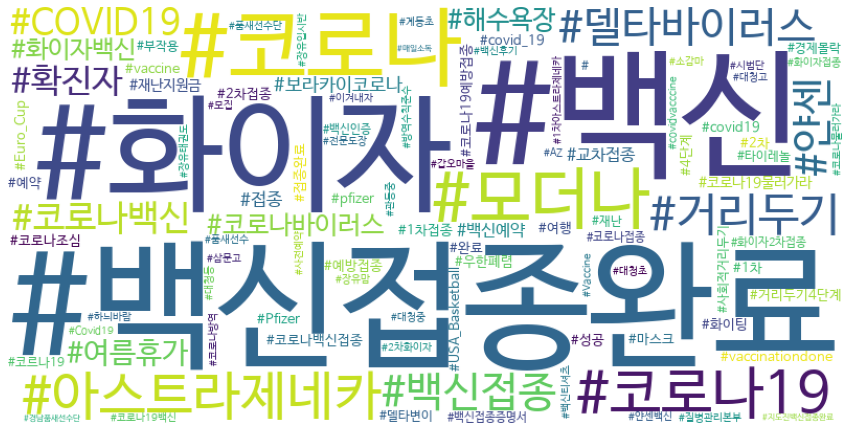

In [ ]:
#해시태그로 워드클라우드 
import matplotlib.pyplot as plt
from wordcloud import WordCloud    

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
wordcloud = WordCloud(font_path= fontpath,
                      background_color='white',
                      width=800,
                      height=400,
                      max_words=100,
                      relative_scaling=0.2)
                    
wordcloud.generate_from_frequencies(tag_selected_count)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/insta crawling 과제/crawling_vaccine_tag_wordcloud.png')

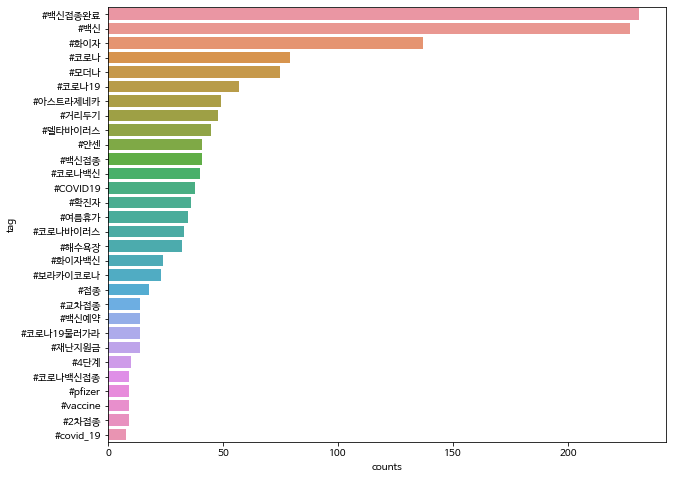

In [ ]:
#해시태그수 분석 막대 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='tag',data=tag_counts_df)
plt.show()

In [68]:
#장소데이터로 워드클라우드


pandas.core.series.Series

In [ ]:
raw_total1=raw_total.fillna(0)
raw_total1

,content,date,like,place,tags
0,💙완료!💉1차때처럼 아무렇지 않고 지나가는걸로~!! 화이자 맞고 열나고 몸살기운 있...,2021-07-07,125,"Seoul, Korea","['#화이자', '#백신', '#2차']"
1,여행가고싶다✈️코로나 백신 빨리 맞게 해주세요ㅠㅠ여행갈 수 있게되면 유튜브계정만들어...,2021-06-22,108,0,[]
2,병원실습 시작과 함께 백신접종#covid_19 #vaccinationdone✔️#서...,2021-06-29,119,서울성모병원 Seoul St. Mary's Hospital,"['#covid_19', '#vaccinationdone✔️', '#서울성모병원']"
3,#듀펠센터얀센 맞고 시베리아급 오한와 발열이 두려웠으나 22시간이 지날때까지 큰 아...,2021-06-17,147,듀펠센터,"['#듀펠센터얀센', '#얀센백신', '#얀센후기', '#백신', '#크림브륄레',..."
4,#트니트니#캥거루선생님필수 인력 백신맞춰 준다더니..맞는 기간은 고작5일...조기접...,2021-07-07,248,0,"['#트니트니', '#캥거루선생님필수', '#백신예약_이건마치전쟁', '#서버폭발🤯..."
...,...,...,...,...,...
500,이 분이 누구 이기에 하늘에 명하여 비를 내리게 할수 있습니까? 이 분이 누구 이기...,2021-07-10,0,0,"['#ProphetDrOwuor', '#비트코인', '#도지코인', '#이더리움',..."
501,[보라카이자유여행/드보라] 7월10일 보라카이 날씨_코로나 이겨내자안녕하세요 보라카...,2021-07-10,0,0,"['#보라카이', '#보라카이코로나', '#트래블버블', '#백신접종완료', '#보..."
502,이 분이 누구 이기에 하늘에 명하여 비를 내리게 할수 있습니까? 이 분이 누구 이기...,2021-07-10,0,0,"['#ProphetDrOwuor', '#비트코인', '#도지코인', '#이더리움',..."
503,"Pour it out , Cheers! 🍹#watermelonmojito 🧊역시 술...",2021-07-10,59,XO Bistro + Bar,"['#watermelonmojito', '#인생2회차', '#수박모히또', '#백신..."


In [ ]:
place_total = raw_total1['place']
from collections import Counter

place_count=Counter(place_total)
place_count.most_common(80)

[(0, 386),
 ('Seoul, Korea', 6),
 ('Incheon, Korea', 3),
 ('제주도', 3),
 ("서울성모병원 Seoul St. Mary's Hospital", 2),
 ('좋은삼선병원', 2),
 ('Ulsan, South Korea', 2),
 ('Busan, South Korea', 2),
 ('Daegu, South Korea', 2),
 ('Suwon', 2),
 ('서초문화예술회관 아트홀', 2),
 ('KITAS - 스마트디바이스쇼', 2),
 ('Yongin', 2),
 ('듀펠센터', 1),
 ('망고', 1),
 ('여행을 떠나요', 1),
 ('금천구청역', 1),
 ('서울시청', 1),
 ('아양아트센터', 1),
 ('Jinhae, Kyŏngsang-Namdo, Korea', 1),
 ('Gwangmyeong', 1),
 ('태이린한약국', 1),
 ('안양실내체육관', 1),
 ('Incheon, South Korea', 1),
 ('출근길', 1),
 ('Jeonju, Korea', 1),
 ('안산시 상록구 감골시민홀', 1),
 ('제일편한내과', 1),
 ('포항시내', 1),
 ('초전동실내체육관', 1),
 ('Hawaii', 1),
 ('울산 - Ulsan, South Korea', 1),
 ('클라이밍 파크 Climbing_park', 1),
 ('Dongducheon', 1),
 ('Gwanaksan', 1),
 ('우리집', 1),
 ('Brantford, Ontario', 1),
 ('Dorval, Quebec', 1),
 ('Malta', 1),
 ('Istanbul, Turkey', 1),
 ('영종도', 1),
 ('무지개마을', 1),
 ('학동사거리', 1),
 ('광주광역시', 1),
 ('Beijing, China', 1),
 ('현대프리미엄아울렛 스페이스원', 1),
 ('서울특별시 서초구 방배동', 1),
 ('장안구보건소', 1),
 ('서울대입구역', 1),
 (

In [ ]:
STOPWORDS=['Istanbul, Turkey','',0,'여행을 떠나요','망고']

place_selected=[]
for place in place_total:
      if place not in STOPWORDS:
        place_selected.append(place)

place_selected_count=Counter(place_selected)
place_selected_count.most_common(80)

[('Seoul, Korea', 6),
 ('Incheon, Korea', 3),
 ('제주도', 3),
 ("서울성모병원 Seoul St. Mary's Hospital", 2),
 ('좋은삼선병원', 2),
 ('Ulsan, South Korea', 2),
 ('Busan, South Korea', 2),
 ('Daegu, South Korea', 2),
 ('Suwon', 2),
 ('서초문화예술회관 아트홀', 2),
 ('KITAS - 스마트디바이스쇼', 2),
 ('Yongin', 2),
 ('듀펠센터', 1),
 ('금천구청역', 1),
 ('서울시청', 1),
 ('아양아트센터', 1),
 ('Jinhae, Kyŏngsang-Namdo, Korea', 1),
 ('Gwangmyeong', 1),
 ('태이린한약국', 1),
 ('안양실내체육관', 1),
 ('Incheon, South Korea', 1),
 ('출근길', 1),
 ('Jeonju, Korea', 1),
 ('안산시 상록구 감골시민홀', 1),
 ('제일편한내과', 1),
 ('포항시내', 1),
 ('초전동실내체육관', 1),
 ('Hawaii', 1),
 ('울산 - Ulsan, South Korea', 1),
 ('클라이밍 파크 Climbing_park', 1),
 ('Dongducheon', 1),
 ('Gwanaksan', 1),
 ('우리집', 1),
 ('Brantford, Ontario', 1),
 ('Dorval, Quebec', 1),
 ('Malta', 1),
 ('영종도', 1),
 ('무지개마을', 1),
 ('학동사거리', 1),
 ('광주광역시', 1),
 ('Beijing, China', 1),
 ('현대프리미엄아울렛 스페이스원', 1),
 ('서울특별시 서초구 방배동', 1),
 ('장안구보건소', 1),
 ('서울대입구역', 1),
 ('원주의료원', 1),
 ('Dublin, California', 1),
 ('광주시민체육관', 1),
 ('부산 사상

In [ ]:
place_counts_df = pd.DataFrame(place_selected_count.most_common(30))
place_counts_df.head()

,0,1
0,"Seoul, Korea",6
1,"Incheon, Korea",3
2,제주도,3
3,서울성모병원 Seoul St. Mary's Hospital,2
4,좋은삼선병원,2


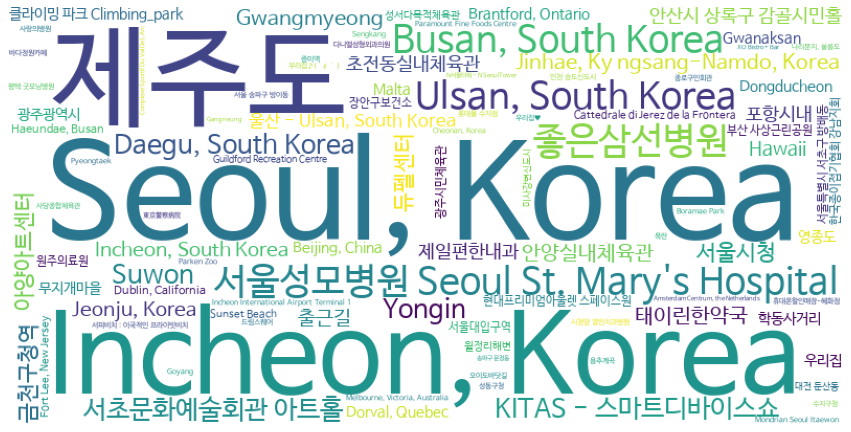

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
wordcloud = WordCloud(font_path= fontpath,
                      background_color='white',
                      width=800,
                      height=400,
                      max_words=100,
                      relative_scaling=.3)#글자크기가 몇만큼 커질 것이냐임 기본은 .5임 
                    
wordcloud.generate_from_frequencies(place_selected_count)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')# 옆에 범위 등이 나타나지 않게 하기 위함. 
plt.savefig('/content/drive/MyDrive/Colab Notebooks/insta crawling 과제/crawling_vaccine_place_wordcloud.png')